In [10]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [31]:
def show_nifti(path, **kwargs):
    
    image = nib.load(path)
    image = image.get_fdata()

    cols = kwargs.get('cols', 8)
    rows = np.ceil(image.shape[2] / cols).astype(int)
    
    fig, axs = plt.subplots(rows, cols, figsize=(20, 2.5*rows))
    for i in range(image.shape[2]):
        ax = axs[i // cols, i % cols]
        ax.imshow(image[:, :, i], cmap='gray')
        ax.set_title(f'Slice {i}')
    
    for i in range(image.shape[2], rows*cols):
        fig.delaxes(axs.flatten()[i])

    plt.tight_layout()
    plt.show()

In [34]:
file_name = 'ID_e2e2e522_ID_7b7b5543dc.nii.gz'

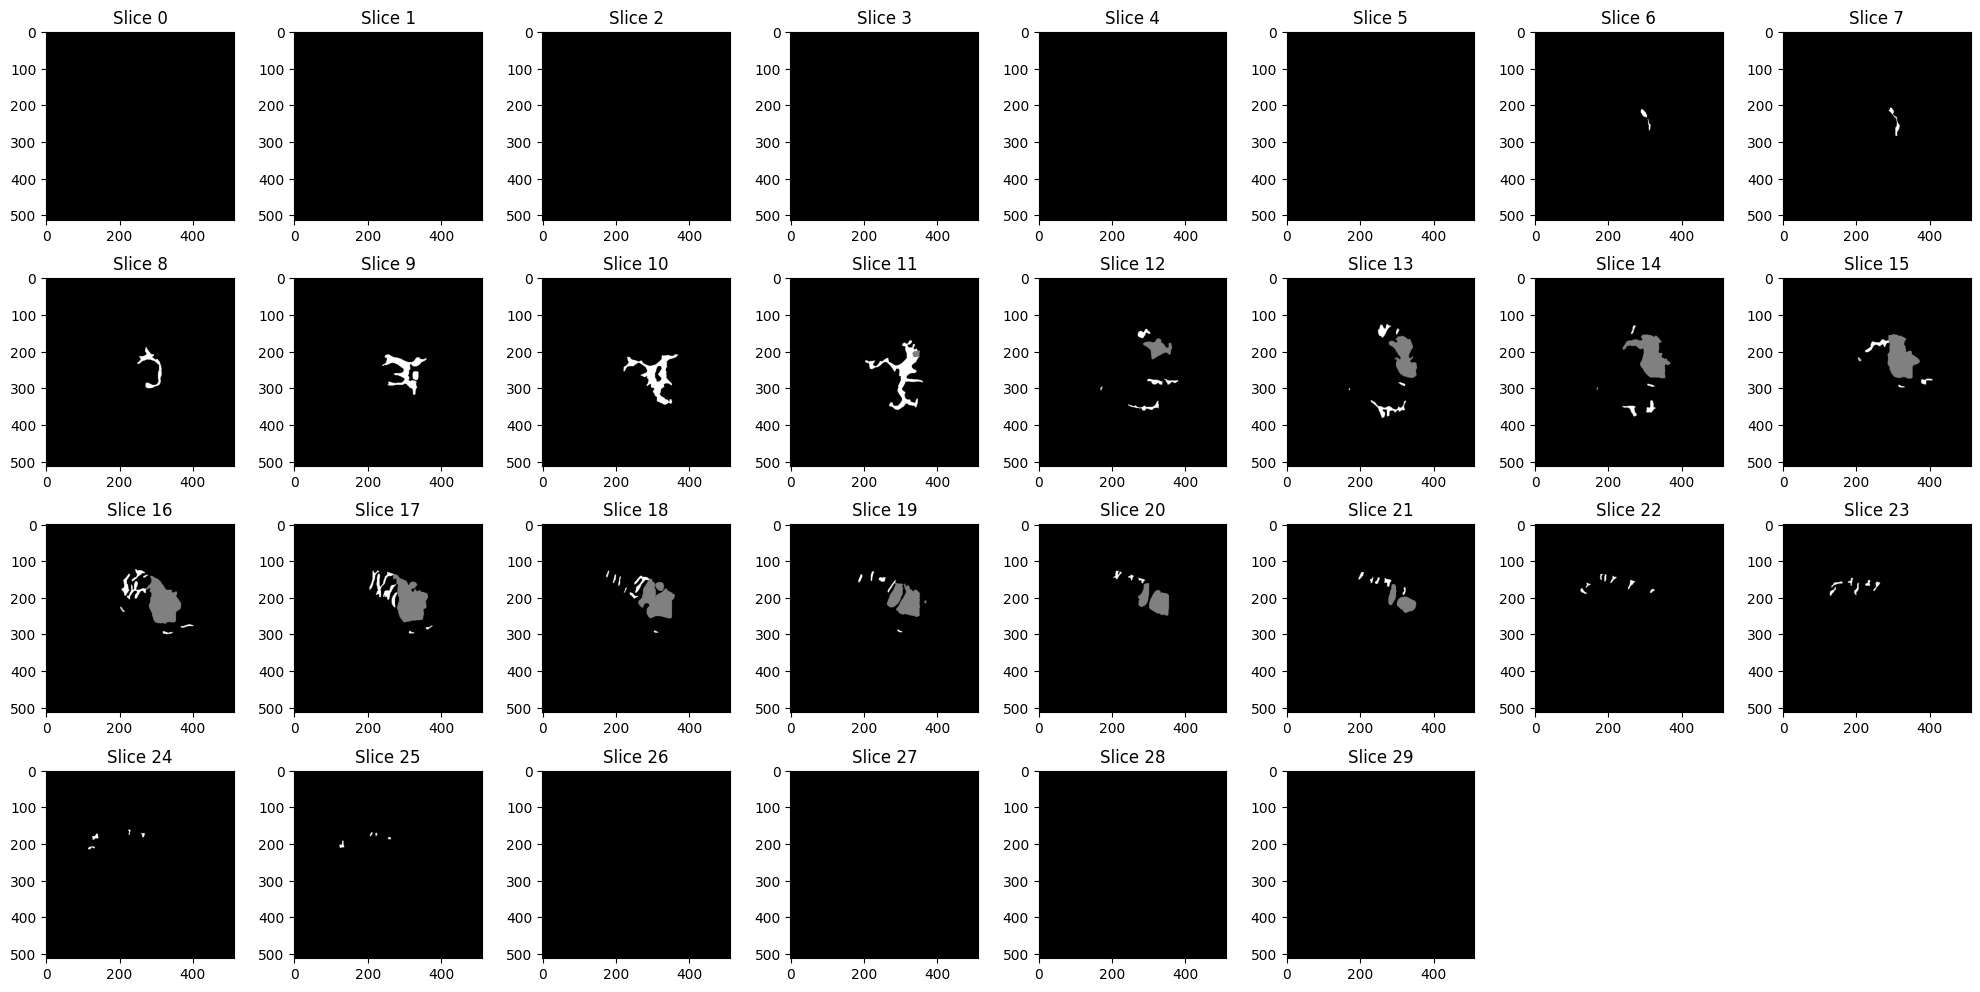

In [35]:
label_path = f'./Dataset/BHSD_original/ground_truths/{file_name}'
show_nifti(label_path)

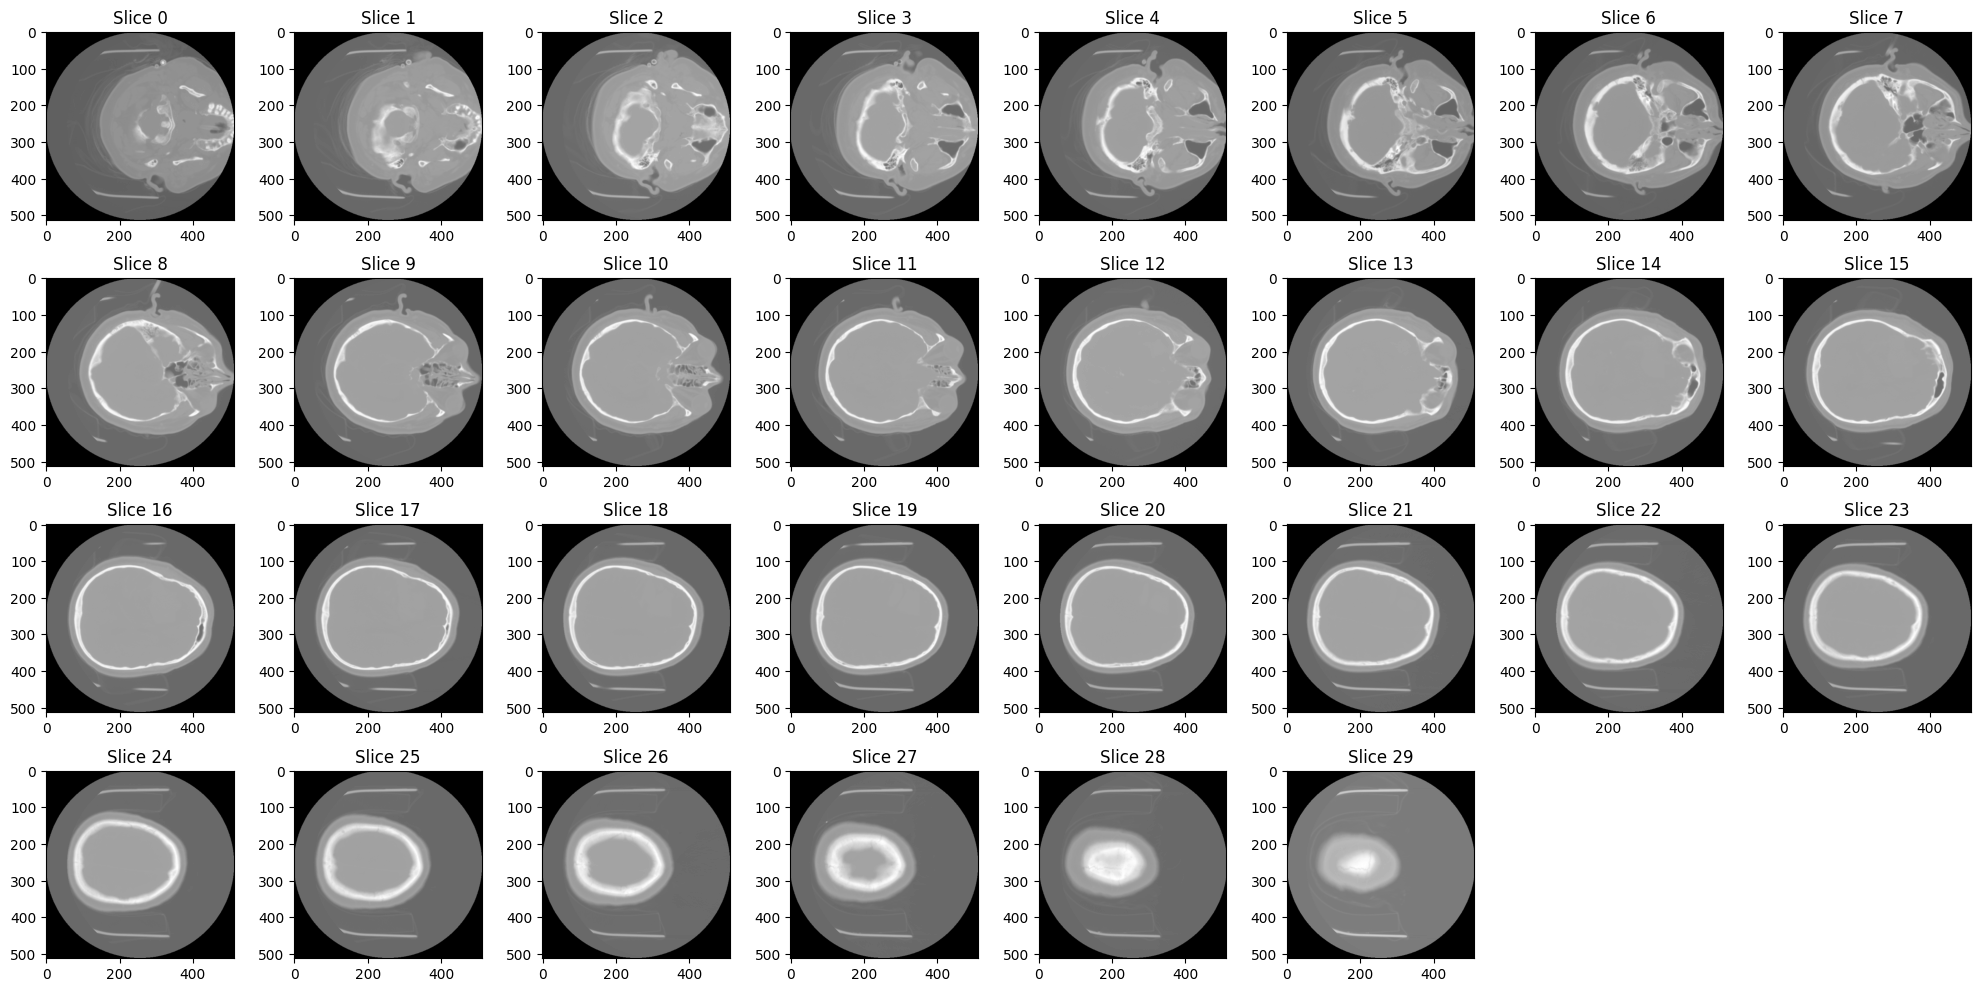

In [36]:
image_path = f'./Dataset/BHSD_original/images/{file_name}'
show_nifti(image_path)

# Training

In [38]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [39]:
image = nib.load(image_path)
image = image.get_fdata()
label = nib.load(label_path)
label = label.get_fdata()

In [41]:
print(image.shape)
print(label.shape)

(512, 512, 30)
(512, 512, 30)


In [ ]:
def unet_model(input_size=(512, 512, 1)):
    inputs = layers.Input(input_size)
    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    # Decoder
    u6 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(p1)
    u6 = layers.concatenate([u6, c1])
    c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c6)
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c6)
    model = models.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model